In [1]:
import random
import itertools
import math
import seaborn as sns

import networkx as nx
import numpy as np
import community

from itertools import combinations
from itertools import compress
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

In [2]:
## Part 1 - Modeling the NCAA College Football 2000 Network ##
G = nx.read_gml("football.gml")

# Print the number of nodes and edges
print('nodes:', G.number_of_nodes())
print('edges:', G.number_of_edges())

nodes: 115
edges: 613


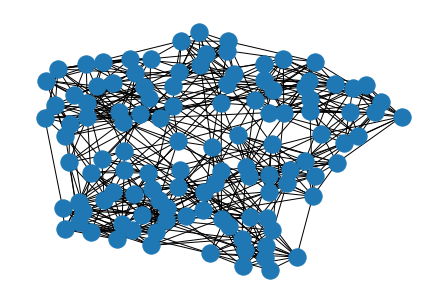

In [3]:
nx.draw(G)

### 1.1 Structural Properties of the Graph


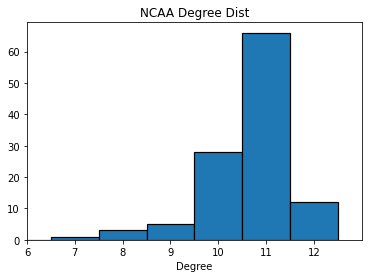

In [4]:
degree_seq = [degree for college,degree in list(G.degree())]

bins = np.arange(14) - 0.5

plt.title('NCAA Degree Dist')
plt.xlabel('Degree')
plt.hist(degree_seq,edgecolor='black', linewidth=1.2,bins = bins)
plt.xticks(range(6,13))
plt.xlim([6, 13]);

In [5]:
partition_results = [community.best_partition(G,resolution=val) for val in range(1,11)]

#sorting results by key
partition_results = [dict(sorted(dictionary.items())) for dictionary in partition_results]

#grouping identifiers
groupings = [list(dictionary.values()) for dictionary in partition_results]

In [6]:
ground_truth = nx.get_node_attributes(G,'value')

ground_truth = dict(sorted(ground_truth.items()))
ground_truth_grouping = list(ground_truth.values())

values = [NMI(ground_truth_grouping,prediction) for prediction in groupings]
values

[0.8495301253259482,
 0.6988975055992245,
 0.5260884864857465,
 0.3515474981846387,
 0.3515474981846387,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
# Find the resolution parameter that leads to highest NMI.
print("A resolution value of 1 gives the largest NMI value of ", values[0])

A resolution value of 1 gives the largest NMI value of  0.8495301253259482


In [8]:
# Plot the inter-community connection density as heatmap.
edges = list(G.edges())
edges_permutation = [(b,a) for a,b in edges]

#edge list complete with permutations
A = [edges,edges_permutation]
edges = list(itertools.chain(*A))

grouped_nodes = {}
for i, v in partition_results[0].items():
    grouped_nodes[v] = [i] if v not in grouped_nodes.keys() else grouped_nodes[v] + [i]

In [9]:
from collections import OrderedDict
 
grouped_nodes = OrderedDict(sorted(grouped_nodes.items()))
keys = list(grouped_nodes.keys())
keys

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [10]:
grouped_nodes = sorted(grouped_nodes.values())

In [11]:
results = []
for a in grouped_nodes:
    for b in grouped_nodes:
        combos = [(x,y) for x in a for y in b]
        #count number of combinations that appear in the edge list
        actual = len([key for key, val in enumerate(combos) if val in set(edges)])
        density = actual/len(combos)
        results.append(density)

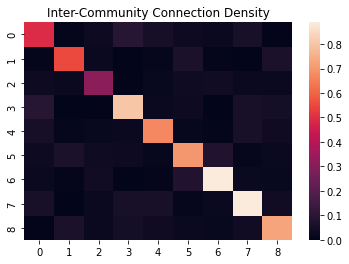

In [12]:
results = np.array(results)
results = results.reshape(int(math.sqrt(len(results))),int(math.sqrt(len(results))))

# plotting the heatmap
hm = sns.heatmap(data = results)
# displaying the plotted heatmap
plt.title('Inter-Community Connection Density')
plt.show()

In [13]:
# Print the:
# network diameter
print('Diameter: ', nx.diameter(G))
# characteristic path length (CPL)
print('CPL: ', nx.average_shortest_path_length(G))
# average clustering coefficient
print('Avg. CC: ', nx.average_clustering(G))
# transitivity, and assortativity. 
print('Transitivity and Assortativity: ', nx.transitivity(G),', ', nx.degree_assortativity_coefficient(G))

Diameter:  4
CPL:  2.5081617086193746
Avg. CC:  0.40321601104209814
Transitivity and Assortativity:  0.4072398190045249 ,  0.16244224957444287


### 1.2 Configuration Model

In [14]:
models = [nx.configuration_model(degree_seq, create_using=nx.Graph()) for i in range(0,100)]

diameters = [nx.diameter(graph) for graph in models]
CPLs = [nx.average_shortest_path_length(graph) for graph in models]
CCs = [nx.average_clustering(graph) for graph in models]
trans = [nx.transitivity(graph) for graph in models]
assor = [nx.degree_assortativity_coefficient(graph) for graph in models]

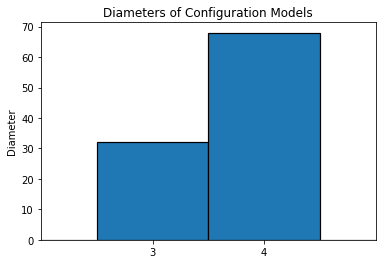

In [15]:
bins = np.arange(7) - 0.5

plt.title('Diameters of Configuration Models')
plt.ylabel('Diameter')
plt.hist(diameters,edgecolor='black', linewidth=1.2,bins = bins);
plt.xticks(range(3,5))
plt.xlim([2, 5]);

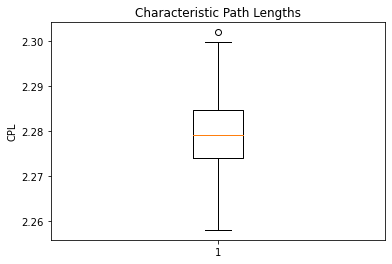

In [16]:
plt.title('Characteristic Path Lengths')
plt.ylabel('CPL')
plt.boxplot(CPLs);

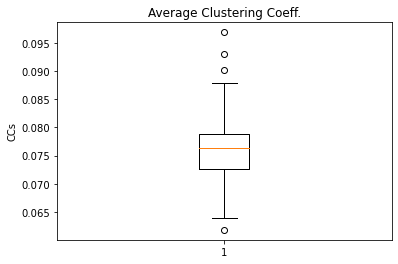

In [17]:
plt.title('Average Clustering Coeff.')
plt.ylabel('CCs')
plt.boxplot(CCs);

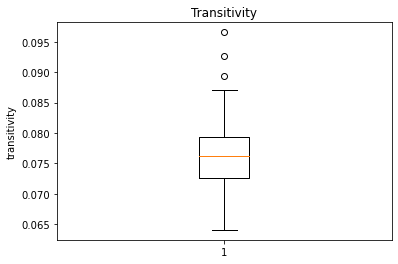

In [18]:
plt.title('Transitivity')
plt.ylabel('transitivity')
plt.boxplot(trans);

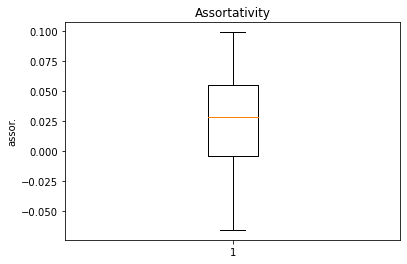

In [19]:
plt.title('Assortativity')
plt.ylabel('assor.')
plt.boxplot(assor);

### 1.3 Stochastic Block Model Graphs

In [20]:
sizes = [len(group) for group in grouped_nodes]
probs = results
s_models = [nx.stochastic_block_model(sizes,probs) for i in range(0,100)]

s_diameters = [nx.diameter(graph) for graph in s_models]
s_CPLs = [nx.average_shortest_path_length(graph) for graph in s_models]
s_CCs = [nx.average_clustering(graph) for graph in s_models]
s_trans = [nx.transitivity(graph) for graph in s_models]
s_assor = [nx.degree_assortativity_coefficient(graph) for graph in s_models]

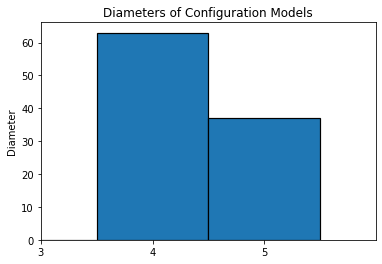

In [21]:
bins = np.arange(7) - 0.5

plt.title('Diameters of Configuration Models')
plt.ylabel('Diameter')
plt.hist(s_diameters,edgecolor='black', linewidth=1.2,bins = bins);
plt.xticks(range(3,6))
plt.xlim([3, 6]);

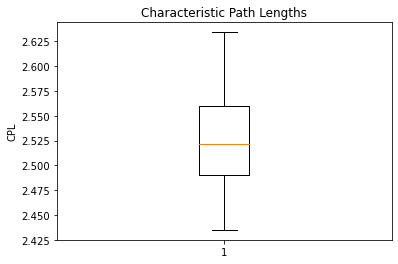

In [22]:
plt.title('Characteristic Path Lengths')
plt.ylabel('CPL')
plt.boxplot(s_CPLs);

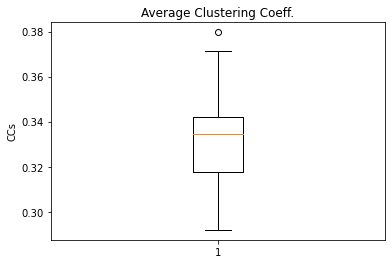

In [23]:
plt.title('Average Clustering Coeff.')
plt.ylabel('CCs')
plt.boxplot(s_CCs);

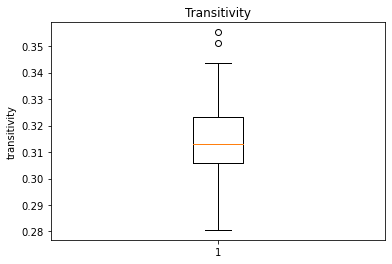

In [24]:
plt.title('Transitivity')
plt.ylabel('transitivity')
plt.boxplot(s_trans);

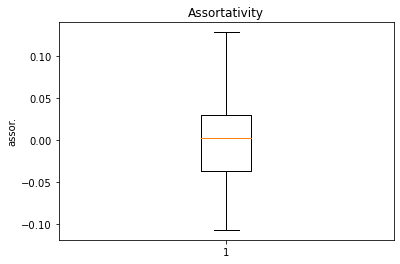

In [25]:
plt.title('Assortativity')
plt.ylabel('assor.')
plt.boxplot(s_assor);

### 1.4 Hierarchical Random Graphs

In [26]:
dendrogram = nx.read_gml("football-hrg.gml")
#access attibute like below
#dendrogram.nodes['_D0']['p']

### *note computation takes a while*

In [27]:
# Generate Graphs
inner_nodes = [node for node,out_degree in list(dendrogram.out_degree()) if out_degree>0]
leaf_nodes = [node for node,out_degree in list(dendrogram.out_degree()) if out_degree==0]
node_pairs = list(itertools.combinations(leaf_nodes, 2))

#lowest common ancestors
LCAs = [((n1,n2),nx.lowest_common_ancestor(dendrogram,n1,n2)) for (n1,n2) in node_pairs]
#probabilities of lowest common ancestors
probs = [dendrogram.nodes[lca]['p'] for ((a,b),lca) in LCAs]


random_graphs = []
for i in range(0,100):
    
    graph = nx.Graph()
    graph.add_nodes_from(leaf_nodes)
    #logical mask for node pairs
    mask = [ True if np.random.uniform(low=0, high=1) < probability else False for probability in probs ]

    edge_list = [(a,b) for ((a,b),lca) in list(compress(LCAs,mask))]
    
    graph.add_edges_from(edge_list)
    
    random_graphs.append(graph)

In [28]:
h_diameters = [nx.diameter(graph) for graph in random_graphs]
h_CPLs = [nx.average_shortest_path_length(graph) for graph in random_graphs]
h_CCs = [nx.average_clustering(graph) for graph in random_graphs]
h_trans = [nx.transitivity(graph) for graph in random_graphs]
h_assor = [nx.degree_assortativity_coefficient(graph) for graph in random_graphs]

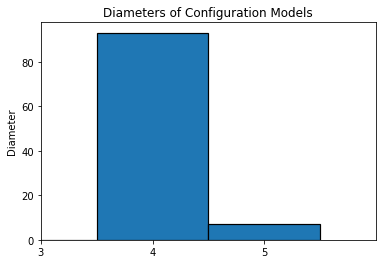

In [29]:
bins = np.arange(7) - 0.5

plt.title('Diameters of Configuration Models')
plt.ylabel('Diameter')
plt.hist(h_diameters,edgecolor='black', linewidth=1.2,bins = bins);
plt.xticks(range(3,6))
plt.xlim([3, 6]);

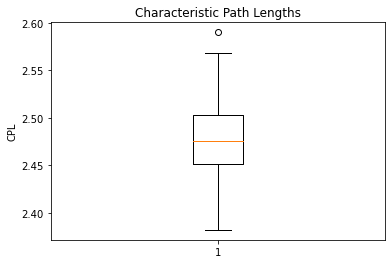

In [30]:
plt.title('Characteristic Path Lengths')
plt.ylabel('CPL')
plt.boxplot(h_CPLs);

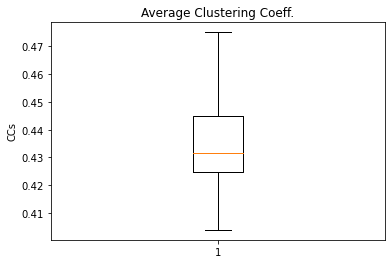

In [31]:
plt.title('Average Clustering Coeff.')
plt.ylabel('CCs')
plt.boxplot(h_CCs);

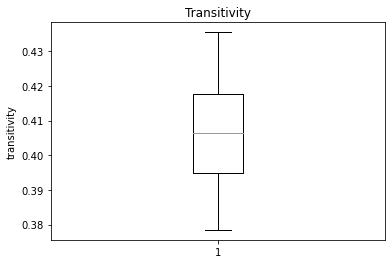

In [32]:
plt.title('Transitivity')
plt.ylabel('transitivity')
plt.boxplot(h_trans);

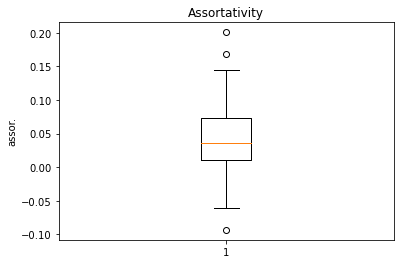

In [33]:
plt.title('Assortativity')
plt.ylabel('assor.')
plt.boxplot(h_assor);

## 1.5 Best Fit

### Emperical

In [34]:
# Print the:
# network diameter
D =nx.diameter(G)
CPL=nx.average_shortest_path_length(G)
AC=nx.average_clustering(G)
T = nx.transitivity(G)
A = nx.degree_assortativity_coefficient(G)

print('Diameter: ', D)
# characteristic path length (CPL)
print('CPL: ', CPL)
# average clustering coefficient
print('Avg. CC: ', AC)
# transitivity, and assortativity. 
print('Transitivity and Assortativity: ', T,', ', A)

Diameter:  4
CPL:  2.5081617086193746
Avg. CC:  0.40321601104209814
Transitivity and Assortativity:  0.4072398190045249 ,  0.16244224957444287


In [35]:
# Configuration Model Graphs
from statistics import mean
from statistics import stdev
from scipy.stats import ttest_1samp

print('Average Diameter: ', mean(diameters))
print('Average CPL: ', mean(CPLs))
print('Average CCs: ', mean(CCs))
print('Transitivity and Assortativity: ', mean(trans) , ', Average Assortativity: ', mean(assor))

Average Diameter:  3.68
Average CPL:  2.279551487414188
Average CCs:  0.07608911474998425
Transitivity and Assortativity:  0.07622988292146846 , Average Assortativity:  0.025788670787507385


In [36]:
# Hypothesis Tests
print(list(ttest_1samp(diameters,D)))
print(list(ttest_1samp(CPLs, CPL)))
print(list(ttest_1samp(CCs, AC)))
print(list(ttest_1samp(trans, T)))
print(list(ttest_1samp(assor, A)))

# P-Values for diameter,
# CPL,
# average clustering coefficient,
# transitivity,
# assortativity 

[-6.82555750793425, 7.094682356578507e-10]
[-252.6706608797968, 6.325001001620817e-141]
[-579.0268667909186, 1.4911145380146792e-176]
[-606.4401969640729, 1.531895040516144e-178]
[-35.615057783412695, 2.989597863441446e-58]


In [37]:
# Stochastic Block Model Graphs
print('Average Diameter: ', mean(s_diameters))
print('Average CPL: ', mean(s_CPLs))
print('Average CCs: ', mean(s_CCs))
print('Transitivity and Assortativity: ', mean(s_trans) , ', Average Assortativity: ', mean(s_assor))

Average Diameter:  4.37
Average CPL:  2.5252967200610223
Average CCs:  0.332174233531085
Transitivity and Assortativity:  0.31378449089225724 , Average Assortativity:  -3.269448141426173e-05


In [38]:
# Hypothesis Tests
print(list(ttest_1samp(s_diameters,D)))
print(list(ttest_1samp(s_CPLs, CPL)))
print(list(ttest_1samp(s_CCs, AC)))
print(list(ttest_1samp(s_trans, T)))
print(list(ttest_1samp(s_assor, A)))

[7.625146368618584, 1.5109160949252796e-11]
[3.871684067709899, 0.00019397617549250985]
[-39.4039860016167, 2.5873803181618715e-62]
[-59.954123519642984, 1.2722754407399309e-79]
[-35.425101645667105, 4.886308317752122e-58]


In [39]:
# Hierarchical Random Graphs
print('Average Diameter: ', mean(h_diameters))
print('Average CPL: ', mean(h_CPLs))
print('Average CCs: ', mean(h_CCs))
print('Transitivity and Assortativity: ', mean(h_trans) , ', Average Assortativity: ', mean(h_assor))

Average Diameter:  4.07
Average CPL:  2.478186117467582
Average CCs:  0.4343025508928188
Transitivity and Assortativity:  0.4070815487261182 , Average Assortativity:  0.04191222857684456


In [40]:
# Hypothesis Tests
print(list(ttest_1samp(h_diameters,D)))
print(list(ttest_1samp(h_CPLs, CPL)))
print(list(ttest_1samp(h_CCs, AC)))
print(list(ttest_1samp(h_trans, T)))
print(list(ttest_1samp(h_assor, A)))

[2.7297642578116275, 0.007502567538609402]
[-7.8473044315380545, 5.0895449249416565e-12]
[20.064159945304507, 1.167421835836146e-36]
[-0.10990875338631688, 0.9127042295122998]
[-24.334959445746673, 1.4445704291093133e-43]


In [41]:
# Which model do you think best approximates the empirical network? Explain your answer. 

As can be seen above, no test p-value( listed on the right sides) suggested a model was a perfect fit for every metric. The Hierarchical Random Graphs seem to have the most appropriate fit as we can not reject $H_0$ for transitivity for $\alpha$ = 0.1. $H_0$ in this case states that the average model metric is the same as the emperical observation. Further it's metrics most closely match emperical observation.

## Part 2

In [42]:
## Part 2 - Estimate the number of nodes and edges in Slashdot dataset ##
from random import sample
G = nx.read_edgelist("soc-Slashdot0902.txt", delimiter="\t", create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))

 *Use the capture-recapture estimation method to compute the number of
nodes in the network by randomly choosing 2,000 nodes each time. Repeat the
experiment 1000 times and plot the histogram of the estimated number of nodes in the
network (the y-axis is the frequency of occurrence and the x-axis is the estimated
number of nodes).*

In [43]:
# Part 2.1
def intersection(list1, list2):
    return list(set(list1) & set(list2))

N_hat_list = []

for i in range(0,1000):

    S1 = sample(list(G.nodes()),2000)

    S2 = sample(list(G.nodes()),2000)

    n3 = len(intersection(S1,S2))

    N = 2000*2000/n3
    
    N_hat_list.append(round(N))

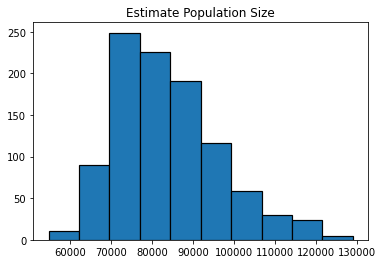

In [44]:
plt.title('Estimate Population Size')
plt.hist(N_hat_list,edgecolor='black', linewidth=1.2);

Repeat the same analysis using samples of 500, 1000, 2000, 5000, and
10000 nodes (but you can skip the histogram this time). Plot the estimated number of
nodes against the number of sampled nodes. Also, plot the mean±std values over 1000
iterations. Compare it against the actual number of nodes in the network and comment
on the trend of estimated values with the sample size.

In [45]:
# Part 2.2
N_list_list = []
N_list = []

sample_sizes = [500,1000,2000,5000,10000]
for value in sample_sizes:
    
    N_list = []
        
    for i in range(0,1000):
        
        S1 = sample(list(G.nodes()),value)

        S2 = sample(list(G.nodes()),value)

        n3 = len(intersection(S1,S2))
        
        if n3 != 0 :
            N = value*value/n3
    
            N_list.append(round(N))
        
        else:
        
            continue
            
    N_list_list.append(N_list)       
    

In [46]:
STDs = [stdev(x) for x in N_list_list]
average_N = [mean(x) for x in N_list_list]
average_N_plus = [average_N[i] + STDs[i] for i in range(0,5)]
average_N_minus = [average_N[i] - STDs[i] for i in range(0,5)]

average_N_plus

[166163.72032391228,
 119049.33881773075,
 96863.12418652995,
 86980.13993058889,
 84285.55440837074]

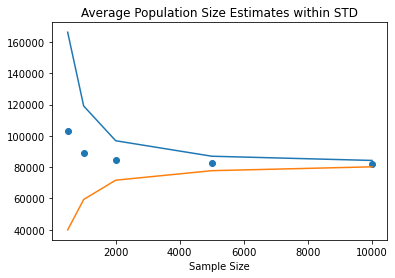

In [47]:
plt.title('Average Population Size Estimates within STD')
plt.xlabel('Sample Size')
plt.scatter(sample_sizes,average_N)
plt.plot(sample_sizes,average_N_plus)
plt.plot(sample_sizes,average_N_minus);

The size estimates appear to be approaching the actual value of 82168 within an increase in sample size as expected. The average estimates also remain within the bounds of 1 standard deviation. 

In [48]:
from tqdm.notebook import trange
n = 5000
N = G.number_of_nodes()

all_estimates = []
for i in trange(0,100):
    
    node_sample = sample(list(G.nodes()),n)
    
    sample_edges = intersection(list(itertools.permutations(node_sample, 2)), list(G.edges()))
    #print(len(sample_edges))
    #estimate number of edges
    tau_hat = len(sample_edges)*(N*(N-1)/(n*(n-1)))
    all_estimates.append(tau_hat)

  0%|          | 0/100 [00:00<?, ?it/s]

### note scale is 1e6

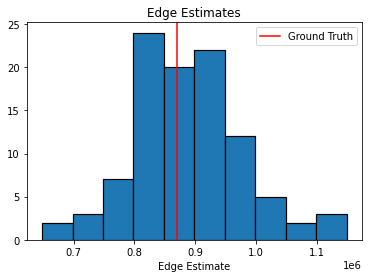

In [49]:
plt.title('Edge Estimates')
plt.xlabel('Edge Estimate')
plt.hist(all_estimates, edgecolor='black', linewidth=1.2)
plt.axvline(x = G.number_of_edges(), color = 'red', label = 'Ground Truth')
plt.legend();

In [50]:
G.number_of_edges()

870161